## 주성분분석(PCA, Principal Component Analysis) : 차원축소모델


In [82]:
# - 주성분(주요 구성요소, 특성)분석, PCA라고도 부릅니다.
# - 대표적인 차원축소 모델
# - 지도/비지도 모두 사용가능합니다.
# - 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 될 가능성은 커짐
#   이때, 차원축소를 이용하면 성능을 유지하면서, 속도를 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성을 선택
# - 데이터 크기(특성)를 줄이면서 학습모델의 성능을 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함

### <장점>
# - 대량의 데이터를 이용하여 모델 훈련 시에
# - 시간이 오래 걸리는 경우 적용해 볼 수 있음
# - 훈련시간 개선 및 성능 유지 또는 향상 가능

## PCA 클래스(모델)

In [83]:
import numpy as np

fruits = np.load("./data/09_fruits_300.npy")
print(fruits.shape)
# 첫번째 축 : 300개 행
# 두번째 축 : 열이 100개
# 세번째 축 : 깊이 100개(실제 데이터가 들어있는 곳)

### 300행에 10000열로 변환
fruits_2d = fruits.reshape(-1, 100 * 100)
print(fruits_2d.shape)

# 데이터프레임으로
import pandas as pd
df = pd.DataFrame(data=fruits_2d)
df

(300, 100, 100)
(300, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [84]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스(모델) 생성하기
# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정해 주어야 합니다.
pca = PCA(n_components=50)

# 훈련모델 생성하기
pca.fit(fruits_2d)

PCA(n_components=50)

In [85]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [86]:
import matplotlib.pyplot as plt

### 3개 클러스터를 각각 테스트하기 위하여 이미지 출력 함수 생성
def draw_fruits(arr, ratio=1) :
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols*ratio, rows*ratio),
                            squeeze = False)
    
    for i in range(rows) :
        for j in range(cols) :
            if i*10+j < n :
                axs[i, j].imshow(arr[i*10+j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()

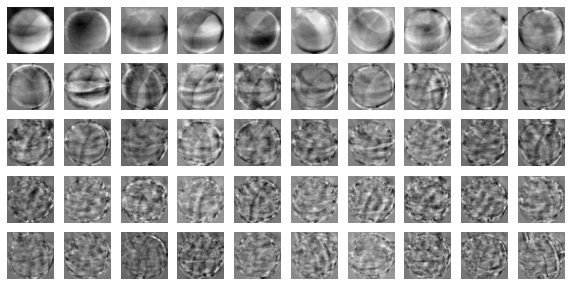

In [87]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [88]:
print(fruits_2d.shape)

(300, 10000)


## 차원 축소하기

In [89]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [90]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [91]:
# 2d -> 3d로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


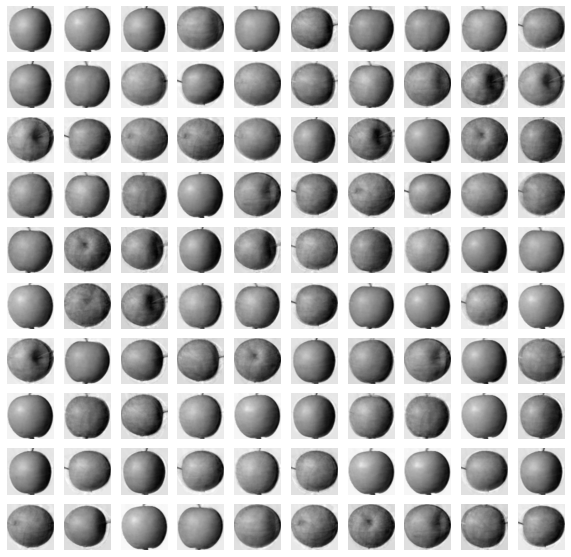

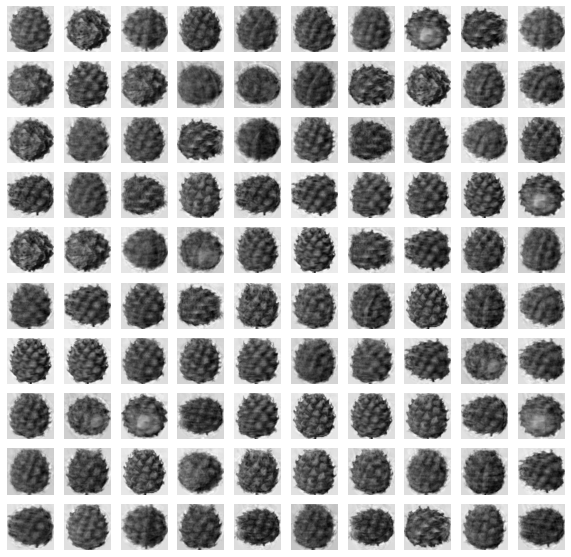

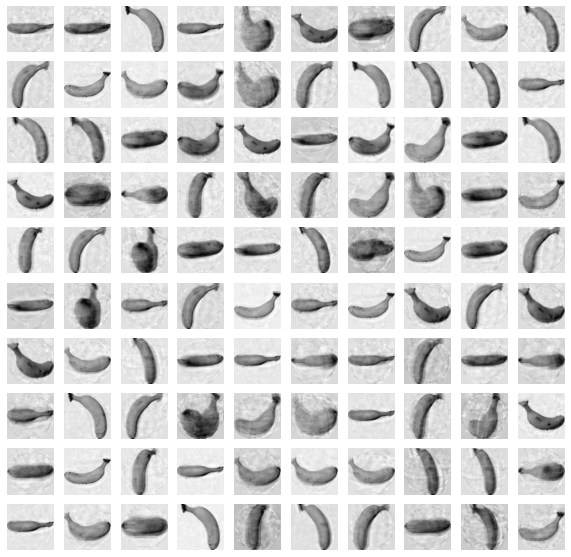

In [92]:
for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start : start + 100])
    print("\n")

## KMeans 모델에 차원축소 데이터 적용하기(비지도학습)

In [93]:
### KMeans 클래스(모델) 생성하기
# 사용패키지 : sklearn.cluster
# 사용클래스(모델) : KMeans
from sklearn.cluster import KMeans

# n_clusters : 클러스터 갯수
km = KMeans(n_clusters=3, random_state=42)

# 훈련모델 생성하기
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [94]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


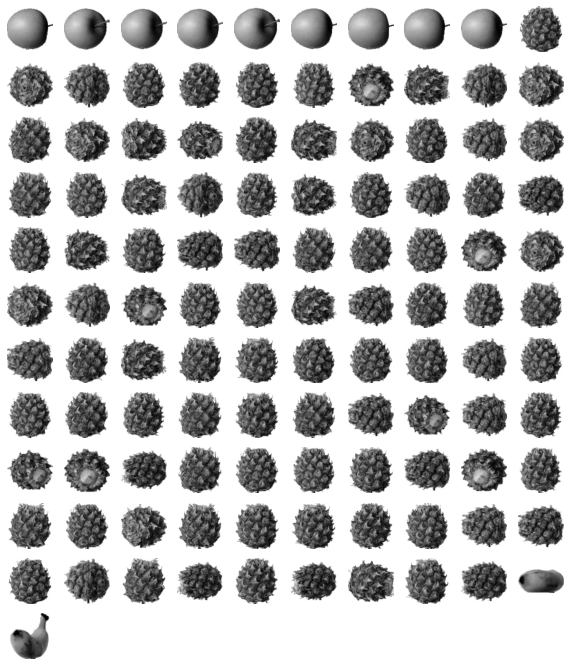

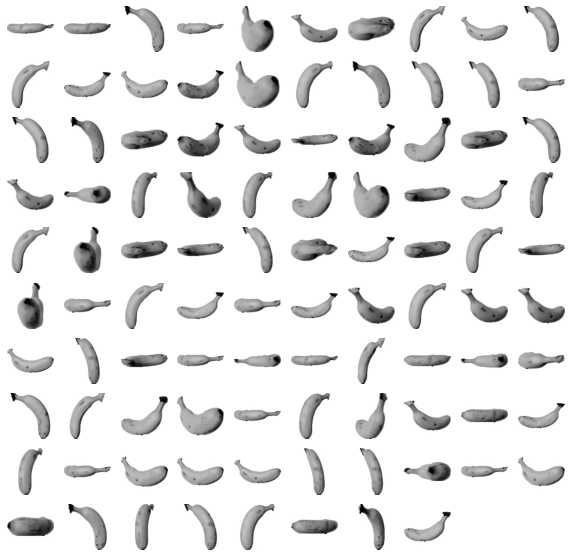

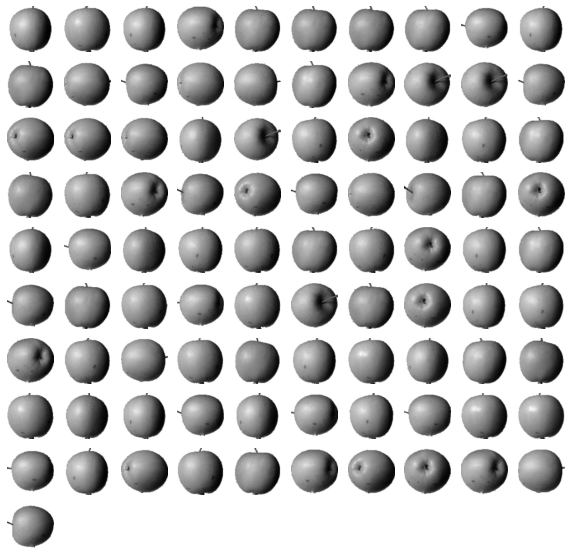

In [95]:
for label in range(0, 3) :
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [96]:
fruits_pca

array([[-2778.41779459, -1571.87380958, -1335.33773939, ...,
           45.98320852,    56.18090003,   -81.3876555 ],
       [-3078.27365136, -2739.27040978,  -636.18337388, ...,
         -110.32210332,   154.23200123,    86.43973926],
       [-2620.61072939, -1486.87055261, -1471.33777697, ...,
            6.22454687,    94.56386776,   -56.78917867],
       ...,
       [ 5182.12868263,   121.76051568,  2777.28502696, ...,
          584.87748826,   -98.12959413,   266.49489095],
       [ 3987.98800619,   -70.88160649, -2925.55235937, ...,
         -367.6040104 ,   -48.2737448 ,  -275.93279141],
       [ 5823.86570617, -1276.98866664,   162.05805525, ...,
          277.034165  ,  -590.00894056,   148.59714113]])

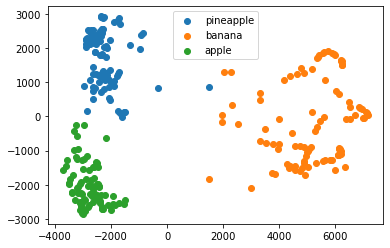

In [97]:
### 클러스터 구성 확인 --> 산점도로 시각화 하여 확인
for label in range(0, 3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[ : , 0], data[ : , 1])
    
plt.legend(["pineapple", "banana", "apple"])
plt.show()

## 로지스틱 회귀모델 적용해보기(지도학습)

In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

### 종송변수(target) 생성하기
# 지도학습을 사용하는 경우 target 변수가 필요합니다.
target = [0]*100 + [1]*100 + [2]*100

In [99]:
df = pd.DataFrame(fruits_2d)
df["target"] = target
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,2
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [115]:
### 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.7020712852478027


In [116]:
print(fruits_2d.shape)

(300, 10000)


In [117]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [118]:
print(pca.n_components_)

2


In [119]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_